In [2]:
import pandas as pd
import os
import numpy as np
from my_utils import open_file,reshape_dataframe,get_name,combine_labels,move_and_rename_image,rename_label,files_to_int,get_file_name,seq_to_int
import shutil
import yaml
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#making the parent dataframe

ALL_LABELS=pd.DataFrame({"image_id":[],"x":[],"y":[],"w":[],"h":[],"x_center":[],"y_center":[],"classes":[]})
ALL_LABELS

,image_id,x,y,w,h,x_center,y_center,classes


In [4]:
extensions={1:".jpg",
            2:".jpg",
            3:".jpg",
            4:".jpg",
            5:".jpg",
            6:".jpg",
            7:".jpg",
            8:".jpg",
            9:".png",
            10:".png",
            11:".jpg",
            12:".jpg",
            13:".jpg",
            14:".jpg",
            15:".jpg",
            16:".jpg",
            17:".jpg",
            18:".jpg",
            19:".jpg",
            20:".jpg",
            21:".jpg",}

In [5]:
cur_dir=os.curdir
image_dir=os.path.join(cur_dir,"my_data","images")
label_dir=os.path.join(cur_dir,"my_data","labels")
ALL_IMAGES_DIR=os.path.join(os.path.join(os.curdir,"my_data","all_images"))
sequences=os.listdir(image_dir)

In [5]:
#preprocessing the labels and images

count=1

for sequence in seq_to_int(sequences):
    
    seq_dir=os.path.join(image_dir,f"Sequence-{sequence}")
    images=os.listdir(seq_dir)
    filename=f"Seq{sequence}-IR.txt"
    seq_label_df=open_file(filename,label_dir)
    seq_label_df=reshape_dataframe(seq_label_df) #getting the desired columns
    
    for image in files_to_int(images):
        filename=get_file_name(image,sequence,extensions) #getting the filename
        rename_label(image,count,seq_label_df) #updating the image_id in labels
        move_and_rename_image(os.path.join(seq_dir,filename),os.path.join(ALL_IMAGES_DIR,f"{count}.jpg")) #updating the image name
        count+=1 #increasing the counter
    
    ALL_LABELS=combine_labels(ALL_LABELS,seq_label_df) #stacking the labels into one dataframe
    
print("Done!!!")


Done!!!


In [6]:
ALL_LABELS

,image_id,x,y,w,h,x_center,y_center,classes
0,1.0,106.760,61.825,72.437,183.560,89.5985,122.6925,1.0
1,2.0,107.200,62.154,71.889,182.080,89.5445,122.1170,1.0
2,3.0,107.640,62.483,71.340,180.600,89.4900,121.5415,1.0
3,4.0,108.080,62.813,70.791,179.120,89.4355,120.9665,1.0
4,5.0,108.520,63.142,70.242,177.640,89.3810,120.3910,1.0
...,...,...,...,...,...,...,...,...
91380,15792.0,96.811,104.590,17.825,33.885,57.3180,69.2375,1.0
91381,15793.0,77.579,103.030,22.953,34.148,50.2660,68.5890,1.0
91382,15793.0,96.811,104.590,17.543,33.885,57.1770,69.2375,1.0
91383,15794.0,77.688,103.240,22.953,34.148,50.3205,68.6940,1.0


In [3]:
df=pd.read_csv(os.path.join(os.curdir,"my_data","labels","ALL_LABELS.txt"),delimiter="\t",names=["image_id","x","y","w","h","x_center","y_center","classes"])

In [24]:
df["image_id"]=df["image_id"].astype(int)
df["classes"]=df["classes"].astype(int)

In [48]:
df["x_center"] =df["x_center"]+df["x"]/2
df["y_center"] =df["y_center"]+df["y"]/2

In [50]:
df["x_center"]=df["x_center"].apply(lambda x: round(x,2))
df["y_center"]=df["y_center"].apply(lambda x: round(x,2))
df["x"]=df["x"].apply(lambda x: round(x,2))
df["y"]=df["y"].apply(lambda x: round(x,2))
df["w"]=df["w"].apply(lambda x: round(x,2))
df["h"]=df["h"].apply(lambda x: round(x,2))

In [37]:
df.to_csv(os.path.join(os.curdir,"my_data","labels","ALL_LABELS.txt"),header=None,sep="\t",mode="w",index=None)

In [9]:
print(len(df["classes"].unique()))
print(df["classes"].unique())


3
[1 3 2]


In [4]:
df

,image_id,x,y,w,h,x_center,y_center,classes
0,1,106.76,61.83,72.44,183.56,142.98,153.60,0
1,2,107.20,62.15,71.89,182.08,143.14,153.19,0
2,3,107.64,62.48,71.34,180.60,143.31,152.78,0
3,4,108.08,62.81,70.79,179.12,143.48,152.38,0
4,5,108.52,63.14,70.24,177.64,143.64,151.96,0
...,...,...,...,...,...,...,...,...
91380,15792,96.81,104.59,17.82,33.88,105.72,121.53,0
91381,15793,77.58,103.03,22.95,34.15,89.06,120.11,0
91382,15793,96.81,104.59,17.54,33.88,105.59,121.53,0
91383,15794,77.69,103.24,22.95,34.15,89.16,120.31,0


In [11]:
df.groupby("classes")["classes"].count()

classes
1    59825
2       70
3    31490
Name: classes, dtype: int64

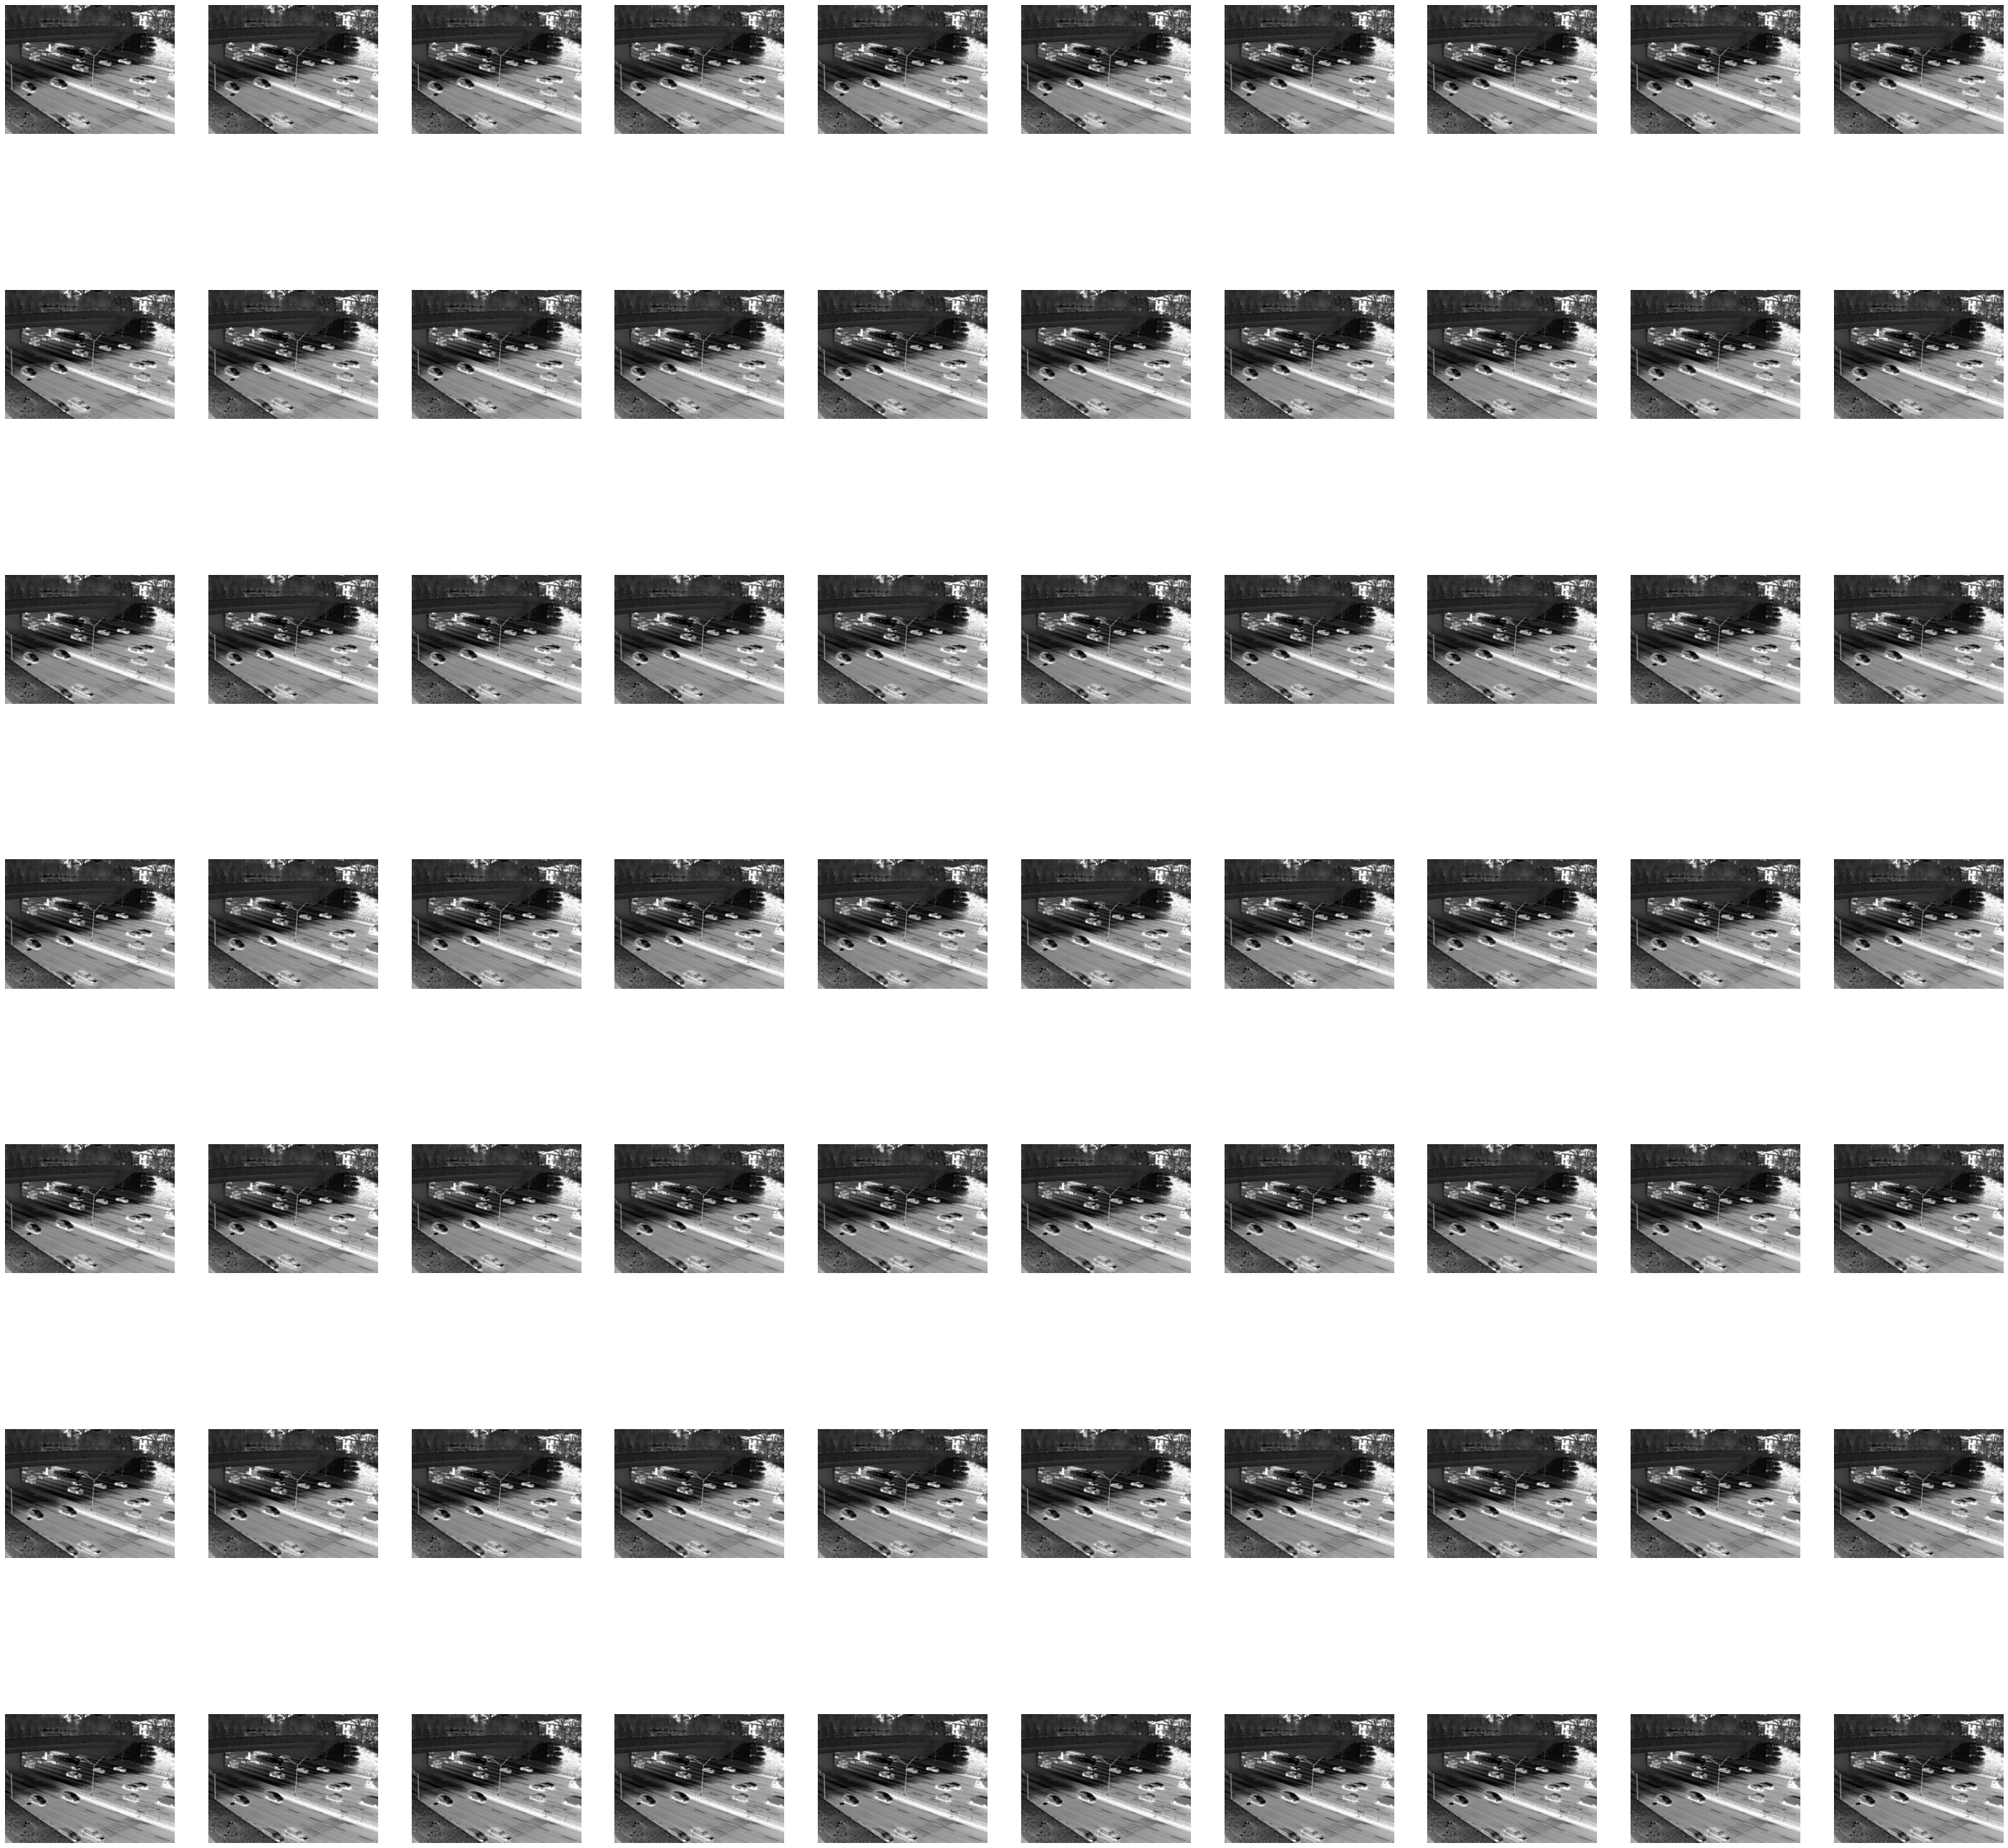

In [8]:
plt.figure(figsize=(50,50))

source=os.path.join(cur_dir,"my_data","all_images")
images=df[df["classes"]==2]["image_id"].values

for i in range(0,70):
    
    try:
        image=Image.open(os.path.join(source,f"{images[i]}.jpg"))
    except NameError:
        image=Image.open(os.path.join(source,f"{images[i]}.png"))
    
    plt.subplot(7,10,i+1)
    plt.imshow(image)
    plt.axis("off")

plt.show()
    

In [24]:
class_map={1:"Person",
 2:"Bicycle",
 3:"Car",
 }

In [14]:
df.drop(df[df["x_center"]<0].index,inplace=True)

In [9]:
#Changing the map to 1----->0, 2------>1, 3----->2

df["classes"].replace(1,0,inplace=True)
df["classes"].replace(2,1,inplace=True)
df["classes"].replace(3,2,inplace=True)

In [4]:
index=list(set(df["image_id"]))
print("Total images ------> ",len(index))

Total images ------>  15794


In [20]:
list(df.groupby("image_id"))[5000][1][["classes","x_center","y_center","w","h",]].astype(float).values

array([[  1.  , 180.11, 152.5 ,  38.28, 120.18],
       [  1.  , 222.67, 164.63,  51.55, 111.5 ],
       [  1.  ,  82.89, 164.13,  70.22, 142.62],
       [  1.  ,  36.21, 160.81,  42.47, 124.71],
       [  1.  , 262.41, 161.69,  36.22, 106.19],
       [  1.  , 137.67, 149.08,  37.87, 115.24],
       [  1.  , 295.63, 129.32,  25.61,  57.62],
       [  1.  , 228.01, 169.55,  83.86, 172.86]])

In [21]:
Image.open(os.path.join(os.curdir,"my_data","all_images","1.jpg")).size

(336, 256)

In [11]:
# #resizing the images in order to fit the model

# if not os.path.exists(os.path.join(os.curdir,"my_data","all_images_resized")):
#     os.makedirs(os.path.join(os.curdir,"my_data","all_images_resized"))

# ALL_IMAGES_DIR=os.path.join(os.path.join(os.curdir,"my_data","all_images"))
# for image in os.listdir(ALL_IMAGES_DIR):
    
#     old_image=Image.open(os.path.join(ALL_IMAGES_DIR,image))
#     new_image=old_image.resize((256,256))
#     im_num=image.split(".")[0]
#     extension=image.split(".")[1]
#     new_image.save(os.path.join(os.curdir,"my_data","all_images_resized",f"{im_num}.{extension}"))

# print("Done Resizing images!!!!!!")

Done Resizing images!!!!!!


In [26]:
df[df["x_center"]>336]

,image_id,x,y,w,h,x_center,y_center,classes
12652,3444,315.52,109.20,44.84,109.55,337.94,163.98,0
17651,3966,297.04,150.51,83.44,107.85,338.76,204.44,0
17662,3967,302.46,150.64,83.44,107.85,344.18,204.57,0
18056,4004,307.68,129.86,57.33,122.04,336.34,190.88,0
18067,4005,311.54,130.20,57.33,122.04,340.21,191.22,0
51983,9460,320.41,136.41,31.49,33.05,336.15,152.94,2
52011,9468,323.17,108.45,31.49,33.69,338.92,125.29,2
52014,9469,322.95,109.51,31.49,33.69,338.69,126.35,2
52017,9470,322.74,110.57,31.49,33.69,338.49,127.41,2
52020,9471,322.53,111.62,31.49,33.69,338.27,128.46,2


In [39]:
image_test=df[df["image_id"]==1]

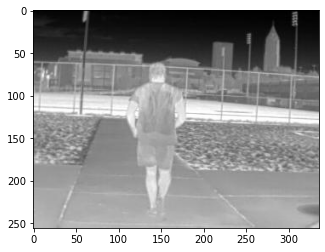

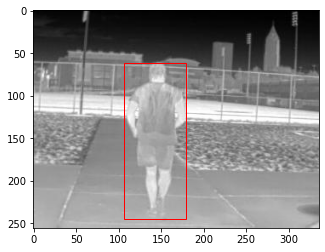

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

x = np.array(Image.open(os.path.join(os.curdir,"my_data","all_images","1.jpg")), dtype=np.uint8)
plt.imshow(x)

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(x)

x_min,y_min=image_test["x_center"].values-image_test["w"].values/2,image_test["y_center"].values-image_test["h"].values/2,
# Create a Rectangle patch
rect = patches.Rectangle((x_min, y_min),image_test["w"].values, image_test["h"].values, linewidth=1,
						edgecolor='r', facecolor="none")

# Add the patch to the Axes
ax.add_patch(rect)
plt.show()


In [29]:
df["y_center"].idxmax()

75024

In [24]:
df["w"].max()

221.87

In [25]:
df["h"].max()

259.29

In [35]:
df.drop(df[df.index==75024].index,inplace=True)

In [5]:
# splitting the data into train and validation sets

cur_dir=os.curdir
image_source_folder=os.path.join(cur_dir,"my_data","all_images")

if True:
        
    val_index=index[len(index)*0//5:len(index)*(0+1)//5]
    for name,mini in df.groupby("image_id"):
        
        if name in val_index:
            path_to_save="val"
        
        else:
            path_to_save="train"
        
        if not os.path.exists(os.path.join(cur_dir,"datasets","infrared","labels",path_to_save)):
            os.makedirs(os.path.join(cur_dir,"datasets","infrared","labels",path_to_save))
        
        with open(os.path.join(cur_dir,"datasets","infrared","labels",path_to_save,f"{name}.txt"),"w+") as fin:
            row=mini[["classes","x_center","y_center","w","h",]].astype(float).values
            #Normalizing x_center and y_center values
            #image size is 336 X 256
            
            row[:,1]/=336
            row[:,2]/=256
            row[:,3]/=336
            row[:,4]/=256
            
            row=row.astype(str)
            
            for j in range(len(row)):
                
                text=" ".join(row[j])
                fin.write(text)
                fin.write("\n")
                
        if not os.path.exists(os.path.join(cur_dir,"datasets","infrared","images",path_to_save)):
                os.makedirs(os.path.join(cur_dir,"datasets","infrared","images",path_to_save))
            
        #dont know the extension of the images so using exception handling
        
        try:
            shutil.copy(os.path.join(image_source_folder,f"{name}.jpg"),os.path.join(cur_dir,"datasets","infrared","images",path_to_save,f"{name}.jpg"))
        
        except NameError:
            shutil.copy(os.path.join(image_source_folder,f"{name}.png"),os.path.join(cur_dir,"datasets","infrared","images",path_to_save,f"{name}.png"))
        
            